# Examples for Applying Newton Method
## Question 1
$f(x) = \log (e^x + e^{-x})$ has a unique minimizer $x^*=0$. Run Newton's  method with fixed step size $t=1$, starting at $x^{(0)}=1$ and $x^{(0)} = 1.1$.

In [4]:
# Load necessary libraries and set the format of the output picture
import autograd.numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import pandas as pd
from autograd import elementwise_grad

def log_func(x):
    y = np.log(
        np.exp(x) + np.exp(-x)
    )
    return y

def log_grad(x):
    grad = elementwise_grad(log_func)
    return grad(x)

def log_grad_grad(x):
    grad = elementwise_grad(log_grad)
    return grad(x)

def newton_method(x0, t, max_iter):
    x_list = []
    x_list.append(x0)
    x = x0
    for i in range(max_iter):
        x = x - t * log_grad(x) / log_grad_grad(x)
        x_list.append(x)
    return x_list

C:\Users\pingg\anaconda3\envs\play\Lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


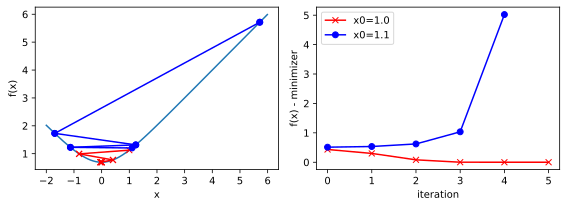

In [5]:
x = np.arange(-2, 6, 0.01)
y = log_func(x)
x0 = 1.0
t = 1.0
max_iter = 5
x0_list = newton_method(x0, t, max_iter)
f0_list = log_func(np.array(x0_list))
minimum = log_func(0)

x1 = 1.1
x1_list = newton_method(x1, t, max_iter)
f1_list = log_func(np.array(x1_list))


fig, (ax, ax1) = plt.subplots(1, 2, figsize=(8, 3))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_xticks(np.arange(-2, 7, 1))
ax.plot(x, y, zorder=1)

for i in range(max_iter):
    ax.plot(
        [x0_list[i], x0_list[i+1]], 
        [f0_list[i], f0_list[i+1]], 
        color='red', zorder=2, marker='x'
    )
    ax.plot(
        [x1_list[i], x1_list[i+1]], 
        [f1_list[i], f1_list[i+1]], 
        color='blue', zorder=2, marker='o'
    )

ax1.set_xlabel('iteration')
ax1.set_ylabel('f(x) - minimizer')


ax1.plot(f0_list-minimum, color='red', marker='x', label='x0=1.0')
ax1.plot(f1_list-minimum, color='blue', marker='o', label='x0=1.1')
ax1.legend()
plt.tight_layout()

plt.show()

In [6]:
# print a double table that shows the iteration process
pd_data = {
    'x0=1.0 (x)': x0_list,
    'x0=1.0 (f(x)-f*)': f0_list-minimum,
    'x0=1.1 (x)': x1_list,
    'x0=1.1 (f(x)-f*)': f1_list-minimum
}
pd_df = pd.DataFrame(pd_data)

pd_df

,x0=1.0 (x),x0=1.0 (f(x)-f*),x0=1.1 (x),x0=1.1 (f(x)-f*)
0,1.000000e+00,4.337808e-01,1.100000,0.511936
1,-8.134302e-01,2.997218e-01,-1.128553,0.534937
2,4.094023e-01,8.156362e-02,1.234131,0.622317
3,-4.730492e-02,1.118461e-03,-1.695166,1.035161
4,7.060280e-05,2.492378e-09,5.715360,5.022224
5,-2.344900e-13,0.000000e+00,-23021.356486,inf
